# Inspect RFI in VLA Data

In [4]:
import numpy as np
from pyuvdata import UVData

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from ipywidgets import interact

from astropy.time import Time
import astropy.units as u

import os
import sys
import yaml
import h5py

sys.path.append(os.getcwd() + "/../")

from vlapy import vladata
from vlapy import inspect

import importlib; importlib.reload(inspect)

<module 'vlapy.inspect' from '/DATA/CARINA_3/kel334/19A-056/vlaimg/nbooks/../vlapy/inspect.py'>

In [5]:
# read yaml configuration file
with open("../input/config.yaml", "r") as file:
    conf = yaml.safe_load(file)

## Load Data

In [36]:
importlib.reload(inspect)

root = conf["root"]
obs = conf["obs list"][0]
ms = os.path.join(root, f"{obs}/{obs}_hanning.ms")

path = os.path.join(root, f"{obs}/output/z_score.h5")

with h5py.File(path, "r") as f:
    z_score = f["z-score"][()]
    flags = f["flags"][()]
    freq_array = f["freq array"][()]
    time_array = f["time array"][()]
    ant_pairs = f["ant pairs"][()]
    dt = f["dt"][()]

z_score = np.ma.masked_array(z_score, mask=flags)

print(z_score.shape)


(2, 351, 1089, 1024)


In [37]:
z_score_wf = np.ma.mean(np.abs(z_score), axis=(0, 1))
z_score_ts = np.ma.mean(np.abs(z_score), axis=(0, 1, 3))

In [ ]:
root = conf["root"]
obs = conf["obs list"][0]
ms = os.path.join(root, f"{obs}/{obs}_hanning.ms/")
ntimes_file = os.path.join(root, f"{obs}/output/ntimes.txt")
ntimes = np.loadtxt(ntimes_file).astype(int)[1:]

In [ ]:
t = Time(time_array, format="jd", scale="utc")


In [ ]:
cmap = mpl.cm.viridis  # Can be any colormap that you want after the cm
cmap.set_bad(color='red')

## Plot L-Band Spectrograms

### Visibility amplitudes averaged across baselines

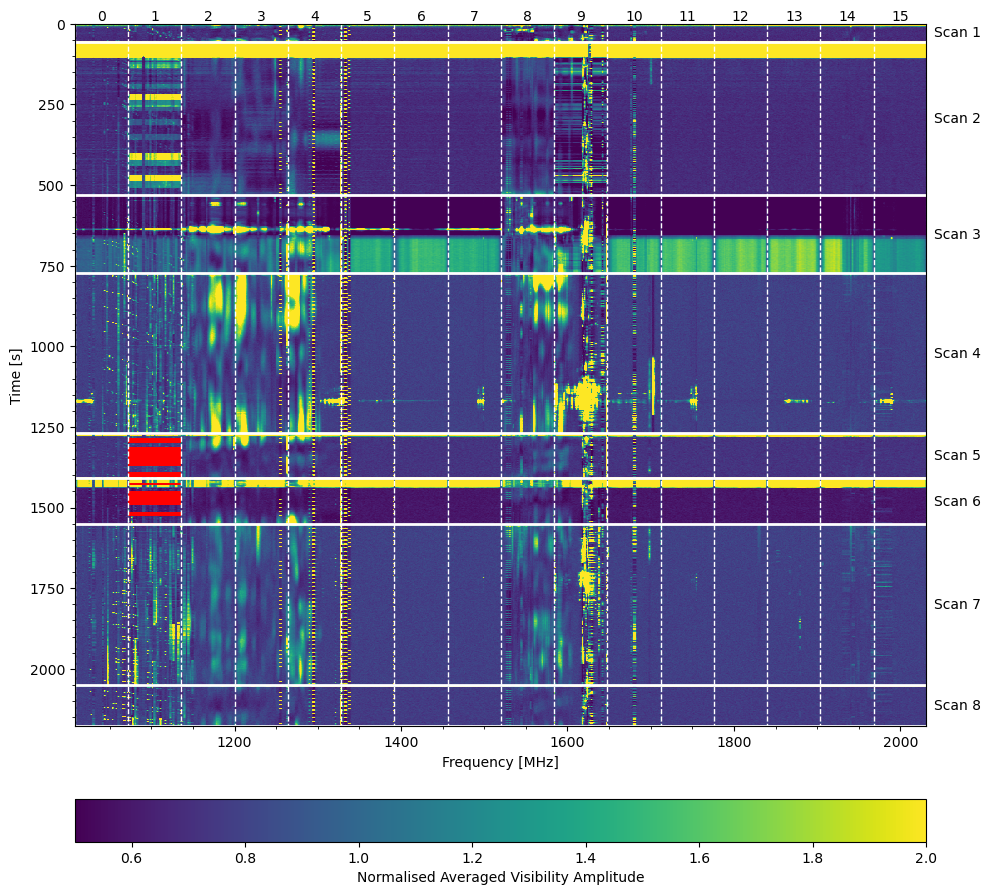

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax, im = inspect.plot_wf(freq_array, z_score_wf, 2, ntimes, vmin=0.5, vmax=2, cmap=cmap, ax=ax, plot_masked=True)
fig.colorbar(im, orientation="horizontal", pad=0.08, label="Normalised Averaged Visibility Amplitude")

In [ ]:
import importlib; importlib.reload(inspect)

def plot_wf_spw(i):
    inspect.plot_wf_spw(freq_array, z_score_wf, i, 2, ntimes, plot_masked=True)
    
interact(plot_wf_spw, i=(0, 15))

interactive(children=(IntSlider(value=7, description='i', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_wf_spw(i)>